In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-data-derby-2022/nyra_tracking_table.csv
/kaggle/input/big-data-derby-2022/nyra_start_table.csv
/kaggle/input/big-data-derby-2022/nyra_race_table.csv
/kaggle/input/big-data-derby-2022/nyra_2019_complete.csv


In [2]:
nyra_start_table = pd.read_csv("../input/big-data-derby-2022/nyra_start_table.csv", low_memory = False)

nyra_start_table.head()

,track_id,race_date,race_number,program_number,weight_carried,jockey,odds
0,AQU,2019-01-01,1,1,123,Dylan Davis,130
1,AQU,2019-01-01,1,2,120,Junior Alvarado,295
2,AQU,2019-01-01,1,3,118,Jose Lezcano,180
3,AQU,2019-01-01,1,4,123,Jomar Garcia,1280
4,AQU,2019-01-01,1,5,118,Manuel Franco,1150


In [3]:
# racetrack race data 
nyra_race_table = pd.read_csv("../input/big-data-derby-2022/nyra_race_table.csv", low_memory = False)

nyra_race_table.head()

,track_id,race_date,race_number,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time
0,AQU,2019-01-01,1,650,D,MY,36,AOC,80000,1220
1,AQU,2019-01-01,2,600,D,MY,48,MCL,41000,1250
2,AQU,2019-01-01,3,550,D,MY,54,MCL,35000,121
3,AQU,2019-01-01,4,900,D,MY,101,AOC,80000,150
4,AQU,2019-01-01,5,700,D,MY,60,ALW,64000,220


In [4]:
# tracking data 
nyra_tracking_table = pd.read_csv("../input/big-data-derby-2022/nyra_tracking_table.csv", low_memory = False)

nyra_tracking_table.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762


In [5]:
nyra_2019_complete = pd.read_csv("../input/big-data-derby-2022/nyra_2019_complete.csv")

nyra_2019_complete.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090


In [6]:
nyra_tracking_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228430 entries, 0 to 5228429
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   track_id        object 
 1   race_date       object 
 2   race_number     int64  
 3   program_number  object 
 4   trakus_index    int64  
 5   latitude        float64
 6   longitude       float64
dtypes: float64(2), int64(2), object(3)
memory usage: 279.2+ MB


In [7]:
nyra_start_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14915 entries, 0 to 14914
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   track_id        14915 non-null  object
 1   race_date       14915 non-null  object
 2   race_number     14915 non-null  int64 
 3   program_number  14915 non-null  object
 4   weight_carried  14915 non-null  int64 
 5   jockey          14915 non-null  object
 6   odds            14915 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 815.8+ KB


In [8]:
nyra_race_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   track_id         2000 non-null   object
 1   race_date        2000 non-null   object
 2   race_number      2000 non-null   int64 
 3   distance_id      2000 non-null   int64 
 4   course_type      2000 non-null   object
 5   track_condition  2000 non-null   object
 6   run_up_distance  2000 non-null   int64 
 7   race_type        2000 non-null   object
 8   purse            2000 non-null   int64 
 9   post_time        2000 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 156.4+ KB


In [9]:
nyra_2019_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228430 entries, 0 to 5228429
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0   track_id         object 
 1   race_date        object 
 2   race_number      int64  
 3   program_number   object 
 4   trakus_index     int64  
 5   latitude         float64
 6   longitude        float64
 7   distance_id      int64  
 8   course_type      object 
 9   track_condition  object 
 10  run_up_distance  int64  
 11  race_type        object 
 12  purse            int64  
 13  post_time        int64  
 14  weight_carried   int64  
 15  jockey           object 
 16  odds             int64  
dtypes: float64(2), int64(8), object(7)
memory usage: 678.1+ MB


### merge key column in Race ID

In [10]:
key_col = ["track_id", "race_date", "race_number"]

for i in [nyra_tracking_table,nyra_start_table,nyra_race_table]:
    i["race_id"] = i[key_col].astype(str).agg('/'.join,axis=1)
    
print(nyra_start_table[key_col].astype(str).agg('/'.join,axis=1))  

0         AQU/2019-01-01/1
1         AQU/2019-01-01/1
2         AQU/2019-01-01/1
3         AQU/2019-01-01/1
4         AQU/2019-01-01/1
               ...        
14910    SAR/2019-09-02/11
14911    SAR/2019-09-02/11
14912    SAR/2019-09-02/11
14913    SAR/2019-09-02/11
14914    SAR/2019-09-02/11
Length: 14915, dtype: object


In [11]:
nyra_2019_complete.nunique()

track_id                 3
race_date              217
race_number             13
program_number          36
trakus_index          1062
latitude           5224784
longitude          5224799
distance_id             20
course_type              5
track_condition          7
run_up_distance        127
race_type               12
purse                   70
post_time              360
weight_carried          35
jockey                 178
odds                   656
dtype: int64

In [12]:
nyra_2019_complete.isnull().sum()

track_id           0
race_date          0
race_number        0
program_number     0
trakus_index       0
latitude           0
longitude          0
distance_id        0
course_type        0
track_condition    0
run_up_distance    0
race_type          0
purse              0
post_time          0
weight_carried     0
jockey             0
odds               0
dtype: int64

In [13]:
nyra_2019_complete.describe()

,race_number,trakus_index,latitude,longitude,distance_id,run_up_distance,purse,post_time,weight_carried,odds
count,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06
mean,5.505409e+00,1.838652e+02,4.120387e+01,-7.377702e+01,7.563151e+02,6.791919e+01,8.887891e+04,4.204248e+02,1.207133e+02,1.482920e+03
std,2.860656e+00,1.183327e+02,9.771227e-01,4.711054e-02,1.796887e+02,3.892271e+01,1.278240e+05,2.802545e+02,4.351881e+00,1.952415e+03
min,1.000000e+00,1.000000e+00,4.066671e+01,-7.383260e+01,4.500000e+02,0.000000e+00,1.600000e+04,1.000000e+02,1.100000e+02,0.000000e+00
25%,3.000000e+00,8.800000e+01,4.067346e+01,-7.382883e+01,6.000000e+02,4.500000e+01,4.100000e+04,2.330000e+02,1.180000e+02,3.350000e+02
50%,6.000000e+00,1.760000e+02,4.071393e+01,-7.376915e+01,8.000000e+02,5.400000e+01,6.200000e+04,3.490000e+02,1.200000e+02,7.300000e+02
75%,8.000000e+00,2.640000e+02,4.071739e+01,-7.372564e+01,8.500000e+02,8.000000e+01,8.000000e+04,5.160000e+02,1.220000e+02,1.740000e+03
max,1.300000e+01,1.062000e+03,4.307399e+01,-7.371483e+01,2.000000e+03,2.800000e+02,1.500000e+06,1.259000e+03,1.600000e+02,1.910000e+04


In [14]:
nyra_2019_complete.track_id.value_counts()

AQU    2158369
BEL    1947134
SAR    1122927
Name: track_id, dtype: int64

In [15]:
nyra_2019_complete.race_number.value_counts()

8     582413
6     575217
5     559884
7     554623
4     523846
2     515115
1     508808
9     492915
3     490256
10    283141
11     98804
12     31725
13     11683
Name: race_number, dtype: int64

In [16]:
nyra_2019_complete.program_number.value_counts()

3      384398
2      382123
4      380695
5      376473
1      374147
6      351460
7      296709
4      230701
8      230499
5      230193
6      228433
3      226627
1      225832
2      220474
7      190196
9      171773
8      142703
10     118871
9       94753
11      72582
10      67964
1A      56753
12      45569
11      44950
12      25794
13      16581
13       9926
14       7803
14       7278
15       4274
2B       4081
15       3643
16       2059
16       1532
3X        334
1X        247
Name: program_number, dtype: int64

In [17]:
nyra_2019_complete['race_date'] = pd.to_datetime(nyra_2019_complete['race_date'])
nyra_2019_complete['day'], nyra_2019_complete['month'] = nyra_2019_complete['race_date'].dt.day, nyra_2019_complete['race_date'].dt.month

In [18]:
nyra_2019_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228430 entries, 0 to 5228429
Data columns (total 19 columns):
 #   Column           Dtype         
---  ------           -----         
 0   track_id         object        
 1   race_date        datetime64[ns]
 2   race_number      int64         
 3   program_number   object        
 4   trakus_index     int64         
 5   latitude         float64       
 6   longitude        float64       
 7   distance_id      int64         
 8   course_type      object        
 9   track_condition  object        
 10  run_up_distance  int64         
 11  race_type        object        
 12  purse            int64         
 13  post_time        int64         
 14  weight_carried   int64         
 15  jockey           object        
 16  odds             int64         
 17  day              int64         
 18  month            int64         
dtypes: datetime64[ns](1), float64(2), int64(10), object(6)
memory usage: 757.9+ MB


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [20]:
#sns.pairplot(nyra_2019_complete, hue = "track_id")
#plt.show()

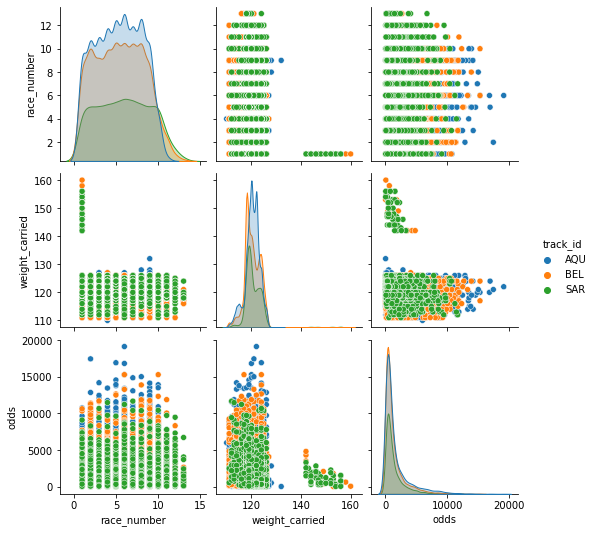

In [21]:
sns.pairplot(nyra_start_table, hue = "track_id")
plt.show()

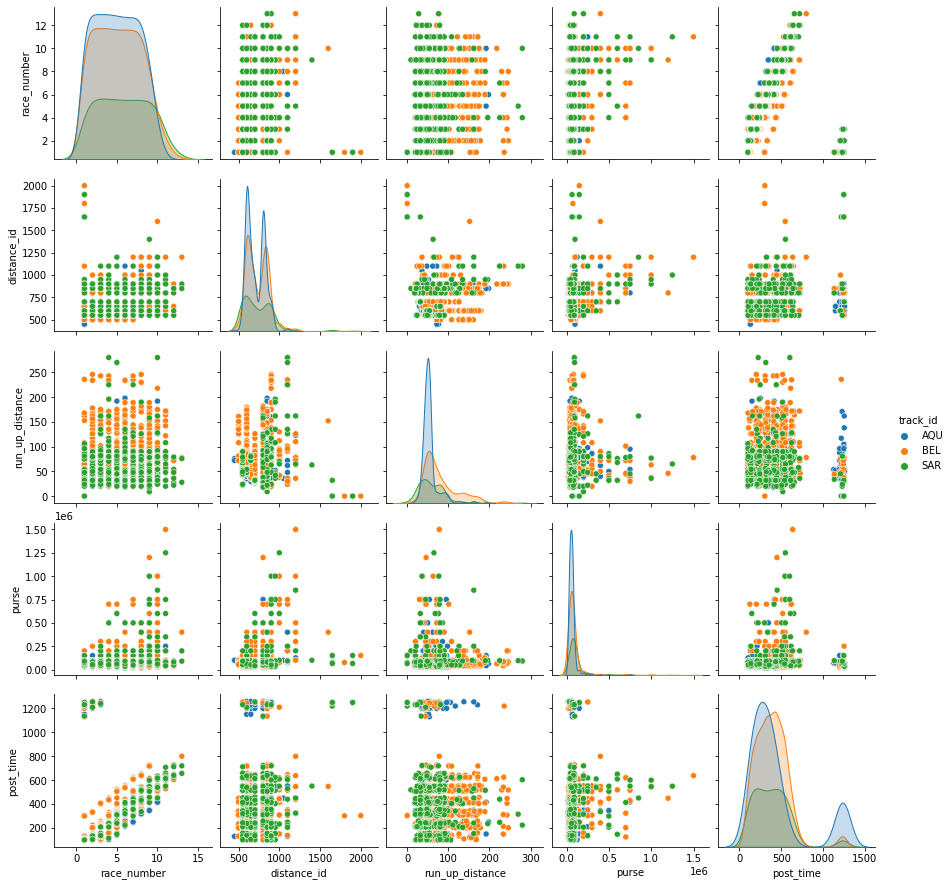

In [22]:
sns.pairplot(nyra_race_table, hue = "track_id")
plt.show()

Text(0, 0.5, 'Unique Race Dates')

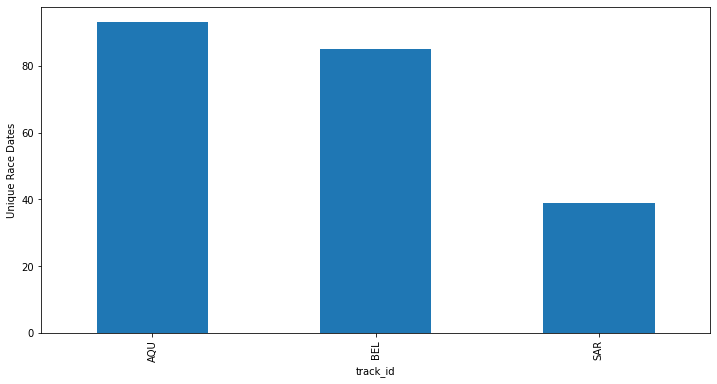

In [23]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
(nyra_start_table.groupby("track_id").race_date.nunique()).plot(kind="bar")
ax.set_ylabel("Unique Race Dates")

Text(0, 0.5, 'Unique Races')

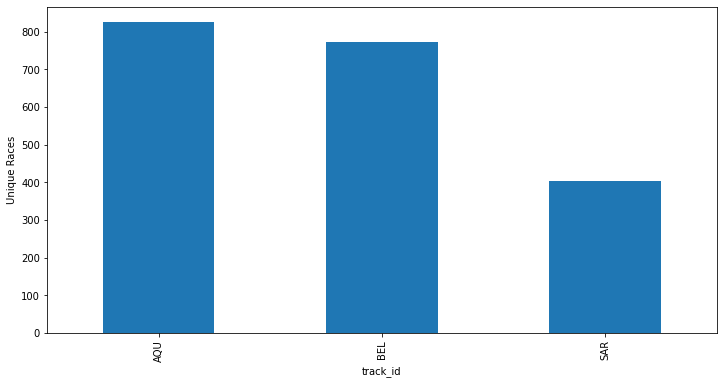

In [24]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
(nyra_start_table.groupby("track_id")["race_id"].nunique()).plot(kind="bar")
ax.set_ylabel("Unique Races")

<AxesSubplot:>

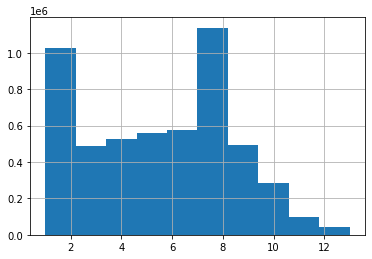

In [25]:
nyra_2019_complete.race_number.hist()

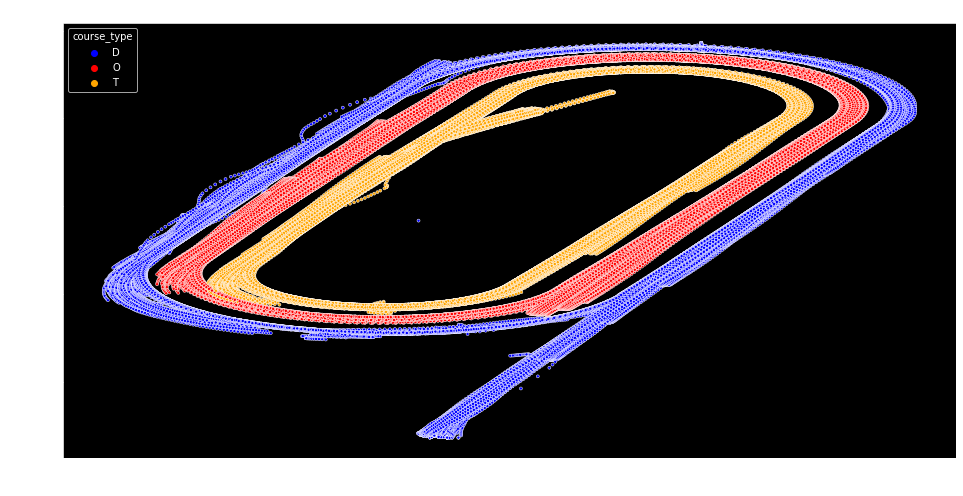

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


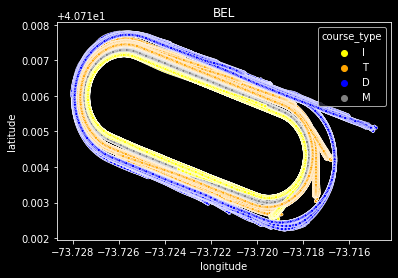

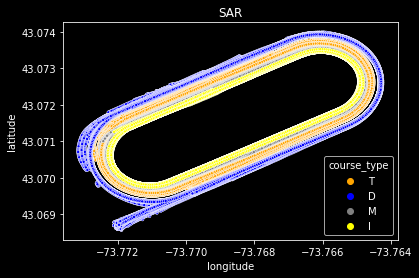

In [26]:
color_dict = {'D' : 'blue',
             'I' : 'yellow',
             'O' : 'red',
             'T' : 'orange',
             'M' : 'grey'}
plt.figure(figsize = (16, 8))
plt.style.use("dark_background")
for track in ['AQU', 'BEL', 'SAR']:
    sns.scatterplot(data = nyra_2019_complete[(nyra_2019_complete.track_id == track)], x = "longitude", y = "latitude", 
                    hue = "course_type", 
                    marker='.',
                   palette=color_dict, )

    plt.title(track)
    plt.show()